# Сердечные заболевания

In [ ]:
Постройте модель, предсказывающую, есть ли болезнь сердца у пациента?



У кого чаще встречаются болезни сердца (пол, возраст)? У кого реже?

Как зависит холестерин от возраста у здоровых людей?

Для начала загрузим данные

In [49]:
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Выделим отдельно нашу целевую переменную (колонка **target**) - есть у человека сердечные заболевания или нет. Остальные колонки оставим, они будут характеризовывать наших потенциальных пациентов

In [13]:
objects = data.drop(columns='target')
targets = data.target

Посмотрим, о скольких людях у нас есть данные и сколько признаков их описывают

In [17]:
objects.shape

(303, 13)

Всего лишь 303 человека. Гм, немного... Для начала стоит разделить данные на обучающую и тестовую выборку. Обучающую выборку мы будем использовать для обучения модели, а тестовую - чтобы оценить качество получившейся модели. Библиотека ***sklearn*** позволяет разделить выборку одной строчкой с помощью функции ***train_test_split***.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
objects_train, objects_test, targets_train, targets_test = train_test_split(objects, targets)

In [22]:
objects_train.shape, objects_test.shape

((227, 13), (76, 13))

Ура! Мы получили выборки по 227 и 76 пациентов. Теперь обучим решающее дерево.

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree_classifier = DecisionTreeClassifier()

In [45]:
tree_classifier.fit(objects_train, targets_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Так, модельку мы обучили. Попробуем посчитать качество на обучающей и тестовой выборке.

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(targets_train, tree_classifier.predict(objects_train))

1.0

In [48]:
accuracy_score(targets_test, tree_classifier.predict(objects_test))

0.7763157894736842

Ой... Качество на обучающей выборке получилось заметно хуже, чем на тестовой. Можем попробовать и какую-нибудь другую модель. Например, что-нибудь линейное - логистическую регрессию.

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_regr = LogisticRegression(max_iter=1000)
log_regr.fit(objects_train, targets_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
accuracy_score(targets_train, log_regr.predict(objects_train))

0.8546255506607929

In [77]:
accuracy_score(targets_test, log_regr.predict(objects_test))

0.8289473684210527

Получается получше, чем у дерева.

Построим графики, чтобы ответить на вопросы задания. Будем пользоваться ***matplotlib***. Нас спрашивают, у какого возраста и пола чаще появляются сердечные заболевания. Возьмем положительные и отрицательные случаи и построим распределение возраста и пола.

In [98]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # размер шрифта для графиков

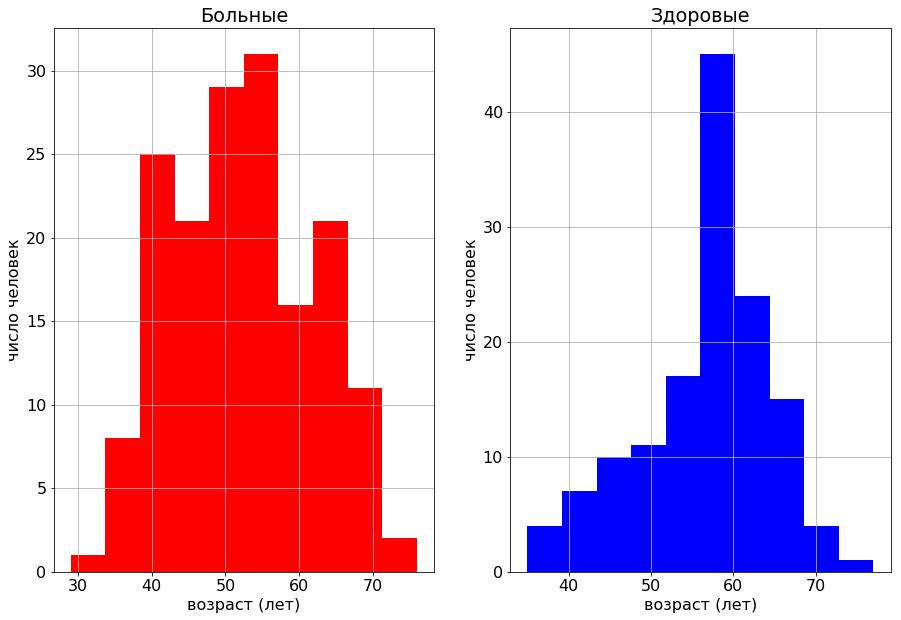

In [109]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10)) # разделим рисунок на два, сделаем его побольше

axs[0].hist(objects[targets == 1].age, bins=10, color='red') # гистограмма возрастов пациентов
axs[1].hist(objects[targets == 0].age, bins=10, color='blue') # гистограмма возрастов здоровых

axs[0].set_xlabel('возраст (лет)') # подпись для горизонатльной оси
axs[1].set_xlabel('возраст (лет)')

axs[0].set_ylabel('число человек') # подпись для вертикальной оси
axs[1].set_ylabel('число человек')

axs[0].set_title('Больные') # заголовки
axs[1].set_title('Здоровые')

axs[0].grid() # нарисовать сетку
axs[1].grid()

plt.show() # показать рисунок

Получается что в этой базе данных больше всего болеют в возрасте около 50 лет, среди здоровых больше всего 60-летних. Для пола нет смысла строить такого же графика (возможных значений всего два). Просто посчитаем больных и здоровых разного пола.

In [111]:
print('Больных мужчин:', ((targets == 1) & (objects.sex == 1)).sum())

Больных мужчин: 93


In [1]:
print('Больных женщин:', ((targets == 1) & (objects.sex == 0)).sum())

NameError: name 'targets' is not defined

In [113]:
print('Здоровых мужчин:', ((targets == 0) & (objects.sex == 1)).sum())

Здоровых мужчин: 114


In [114]:
print('Здоровых женщин:', ((targets == 0) & (objects.sex == 0)).sum())

Здоровых женщин: 24


Посчитаем доли больных для разных полов.

In [115]:
93 / (93 + 114), 72 / (72 + 24)

(0.4492753623188406, 0.75)

Выходит, что среди наших данных женщины больше подвержены заболеваниям. Теперь посмотрим, как зависит холестерин от возраста у здоровых людей.

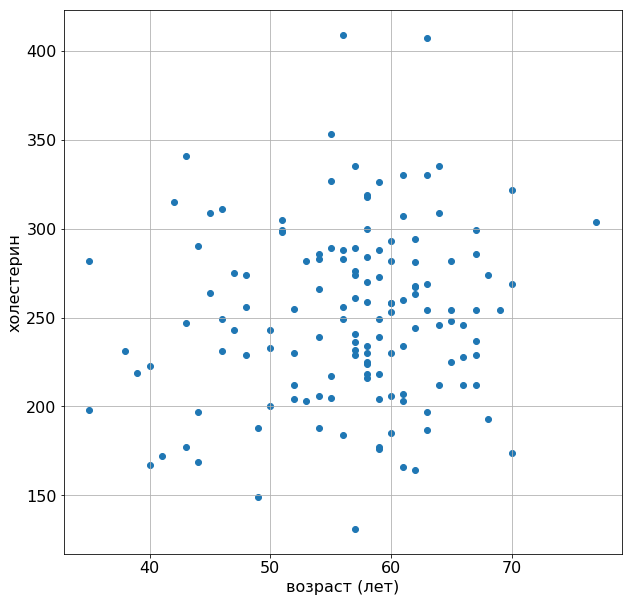

In [106]:
plt.figure(figsize=(10, 10))
plt.scatter(objects[targets == 0].age, objects[targets == 0].chol) # график с точечками

plt.xlabel('возраст (лет)')
plt.ylabel('холестерин')
plt.grid()
plt.show()

Здесь никакого очевидного тренда я не вижу, так что, судя по всему, особо не зависит:)


**Спасибо за внимание, я старалась(:**